In [17]:
# importing libraries

import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Arima Model
!pip install pmdarima
from pmdarima.arima import auto_arima

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# LSTM 
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras import Sequential

In [18]:
df = pd.read_csv("/Users/aameerkhan/Downloads/archive/ADANIPORTS.csv")
df.head(3)


Date      Symbol Series  Prev Close   Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ       440.0  770.0  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ       962.9  984.0   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ       893.9  909.0   914.75  841.0  887.0   

   Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.9  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.9  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.2  888.09   5124121  4.550658e+14     NaN             1069678   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088

In [19]:
df.tail(5)

Date      Symbol Series  Prev Close   Open    High     Low   Last  \
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.0  739.65  728.90  729.2   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.0  757.50  727.35  748.6   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.0  760.00  741.10  743.4   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.2  765.85  743.40  746.4   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.0  759.45  724.50  726.4   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
3317  730.75  733.25   9390549  6.885658e+14  116457.0              838079   
3318  749.15  747.67  20573107  1.538191e+15  236896.0             1779639   
3319  746.25  751.02  11156977  8.379106e+14  130847.0             1342353   
3320  746.75  753.06  13851910  1.043139e+15  153293.0             1304895   
3321  730.05  743.35  12600934  9.366911e+14  132141.0             3514692   

      %Deliverble  
3317       0.0892  
3318       0.0865  
3319       0.1203  
3320       0.0942  
3321       0.2789

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

<AxesSubplot: >

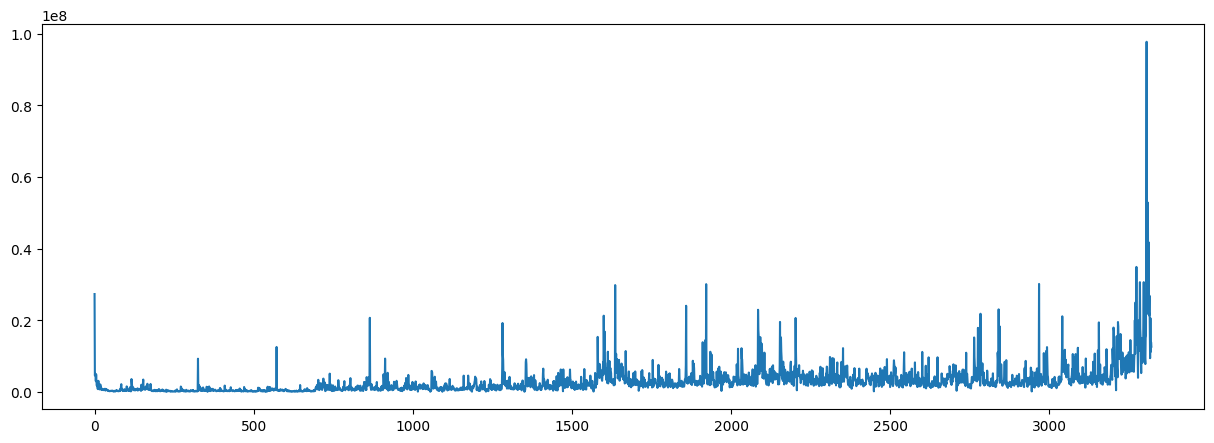

In [21]:
df['Volume'].plot(figsize=(15,5))

In [22]:
data = df[df['Volume']>0]
data.head(3)

Date      Symbol Series  Prev Close   Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ       440.0  770.0  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ       962.9  984.0   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ       893.9  909.0   914.75  841.0  887.0   

   Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.9  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.9  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.2  888.09   5124121  4.550658e+14     NaN             1069678   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088

<AxesSubplot: >

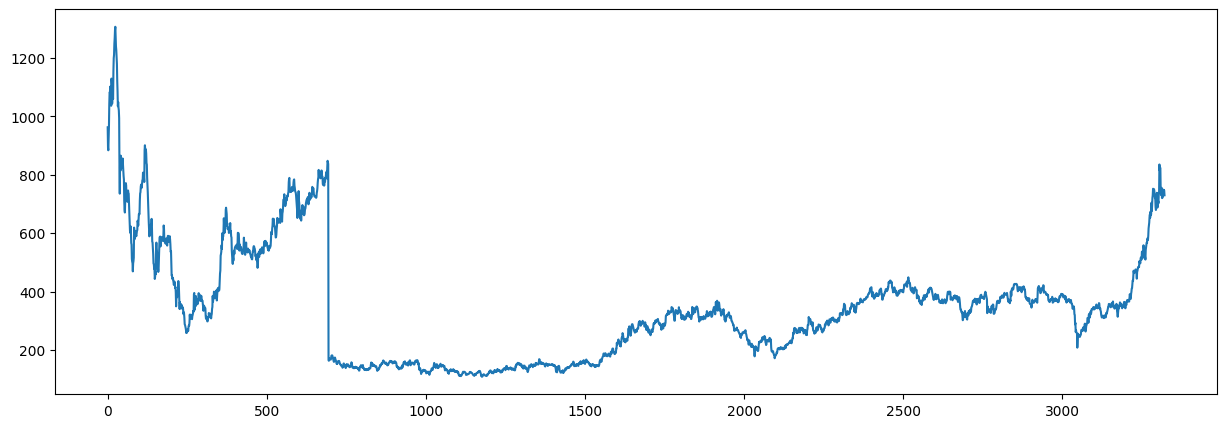

In [23]:
data['Close'].plot(figsize=(15,5))

<AxesSubplot: xlabel='Close', ylabel='Density'>

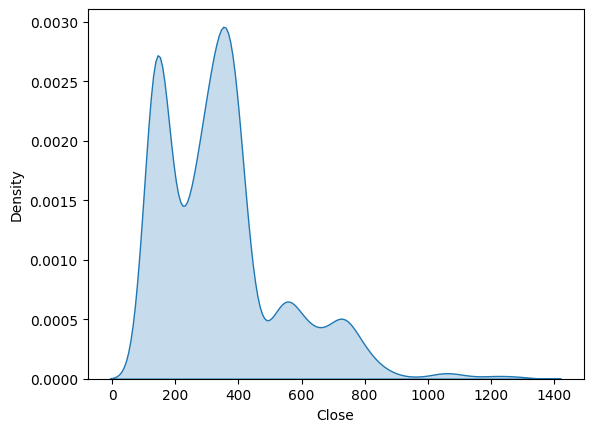

In [24]:
sns.kdeplot(data['Close'], fill=True)

In [25]:

data['Return'] = (data['Prev Close']-data['Open'])/data['Open']

stocks_data = data.copy()

data.sample(5)

Date      Symbol Series  Prev Close    Open   High     Low  \
3304  2021-04-05  ADANIPORTS     EQ      736.25  731.75  745.0  715.00   
1286  2013-02-04  ADANIPORTS     EQ      149.95  151.50  154.9  148.55   
3147  2020-08-18  ADANIPORTS     EQ      357.45  356.90  359.5  354.50   
2221  2016-11-21  ADANIPORTS     EQ      261.90  262.05  265.0  245.15   
3278  2021-02-23  ADANIPORTS     EQ      673.80  680.00  682.7  659.25   

        Last   Close    VWAP    Volume      Turnover    Trades  \
3304  744.00  742.25  730.14  15622924  1.140689e+15  205603.0   
1286  150.00  149.90  151.32   2234003  3.380437e+13   22610.0   
3147  358.25  357.45  357.21   2151419  7.685171e+13   26121.0   
2221  258.65  255.70  253.50   4715918  1.195498e+14   52487.0   
3278  662.00  662.00  668.70  11247164  7.520941e+14  160718.0   

      Deliverable Volume  %Deliverble    Return  
3304             1431477       0.0916  0.006150  
1286             1031013       0.4615 -0.010231  
3147              640332       0.2976  0.001541  
2221             1826801       0.3874 -0.000572  
3278             1350422       0.1201 -0.009118

In [26]:
fig = px.line(data,x="Date",y="Close",title="Closing Price: Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")])))

In [27]:

fig = px.line(data,x="Date",y="Return",title="Returns : Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))

In [93]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                    open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.show()

In [29]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [83]:
fig = go.Figure()
data['Volume_M'] = data["Volume"].asfreq('d')
data['Lag_Volume_M'] = data['Volume'].asfreq('d').shift(10)



In [31]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [84]:
fig = go.Figure()
data['Close_M'] = data["Close"].asfreq('d')
data['Lag_Close_M'] = data['Close'].asfreq('d').shift(10)


In [33]:
def RSI(df,n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp<0]=0
    pricesDown[pricesDown>0]=0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp/rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

data['RSI'] = RSI(df).fillna(0)

fig = go.Figure(go.Scatter(x=data.Date,y=data.RSI,name='RSI'))
fig.show()

In [34]:
data['EMA_12'] = pd.Series(data['Close'].ewm(span=12).mean())
data['EMA_26'] = pd.Series(data['Close'].ewm(span=26).mean())
data['MACD'] = pd.Series(data['EMA_12'] - data['EMA_26'])
data['MACD_signal'] = pd.Series(data.MACD.ewm(span=9,min_periods=9).mean())

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.MACD,name='MACD'))
fig.add_trace(go.Scatter(x=data.Date,y=data.MACD_signal,name='MACD_signal'))
fig.show()

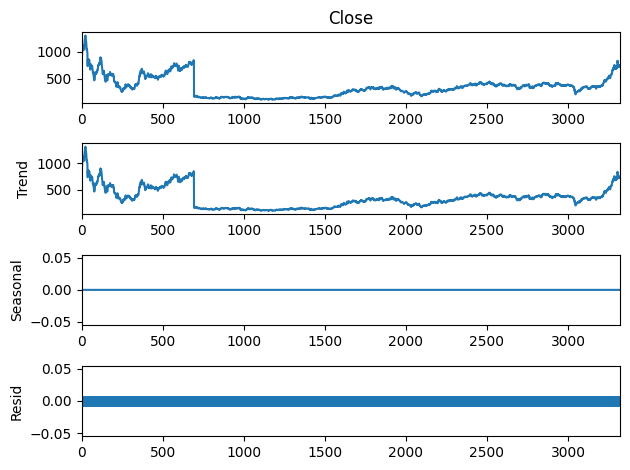

In [35]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=1) # The frequncy is daily
figure = result.plot()

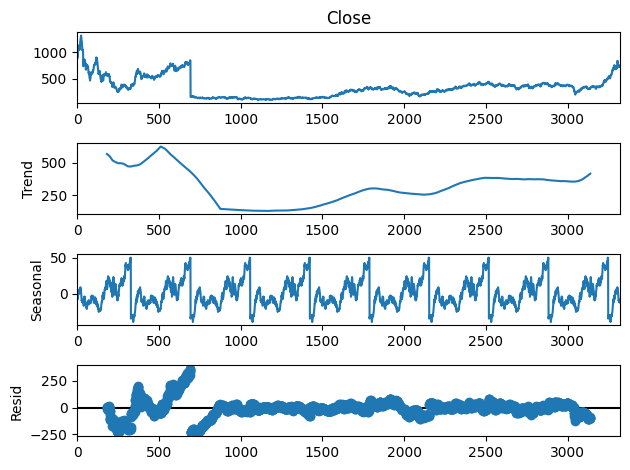

In [36]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=365) # The frequncy is yearly
figure = result.plot()

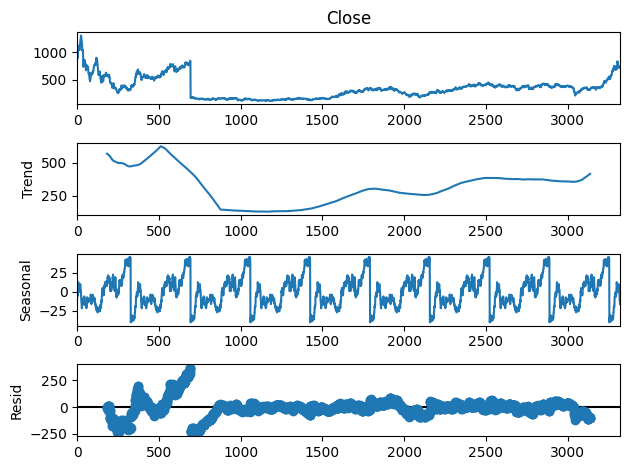

In [37]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=366) # The frequncy is yearly
figure = result.plot()

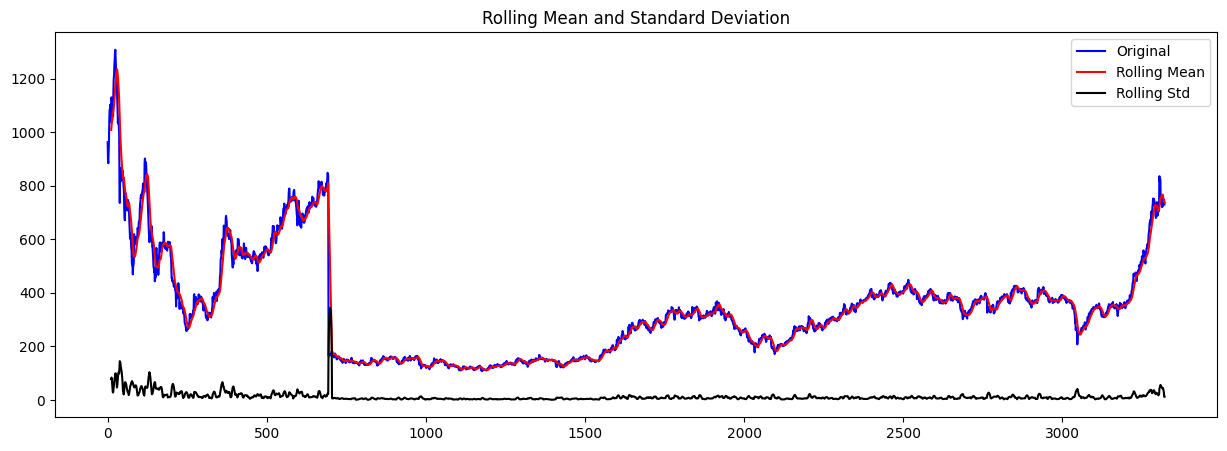

Results of dickey fuller test
Test Statistics                  -3.473098
p-value                           0.008705
No. of lags used                  5.000000
Number of observations used    3316.000000
dtype: float64


In [38]:
#Test for staionarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(data['Close'])  

In [39]:
data['Stocks First Difference']=data['Close']-data['Close'].shift(1)
data['Stocks Seasonal Difference']=data['Close']-data['Close'].shift(12)
data['Stocks Seasonal+Daily Difference']=data['Stocks Seasonal Difference']-data['Stocks Seasonal Difference'].shift(1)

In [40]:
adft = adfuller(data['Stocks First Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics                 -25.916549
p-value                           0.000000
No. of lags used                  4.000000
Number of observations used    3316.000000
dtype: float64


In [41]:
adft = adfuller(data['Stocks Seasonal Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -9.821966e+00
p-value                        5.308752e-17
No. of lags used               2.900000e+01
Number of observations used    3.280000e+03
dtype: float64


In [42]:
adft = adfuller(data['Stocks Seasonal+Daily Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics                 -19.672054
p-value                           0.000000
No. of lags used                 23.000000
Number of observations used    3285.000000
dtype: float64


<AxesSubplot: >

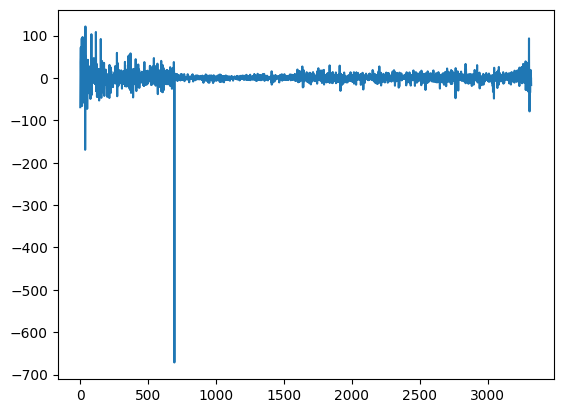

In [43]:
data['Stocks First Difference'].plot()

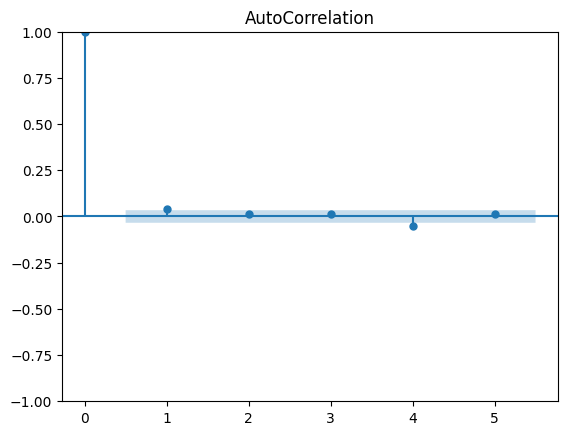

In [44]:
plot_acf(data["Stocks First Difference"].dropna(),lags=5,title="AutoCorrelation")
plt.show()

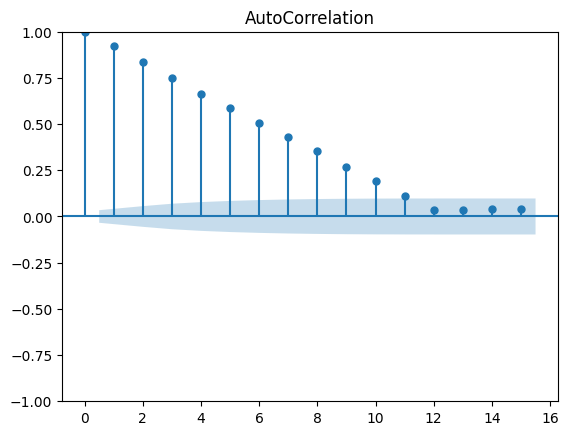

In [45]:
plot_acf(data["Stocks Seasonal Difference"].dropna(),lags=15,title="AutoCorrelation")
plt.show()

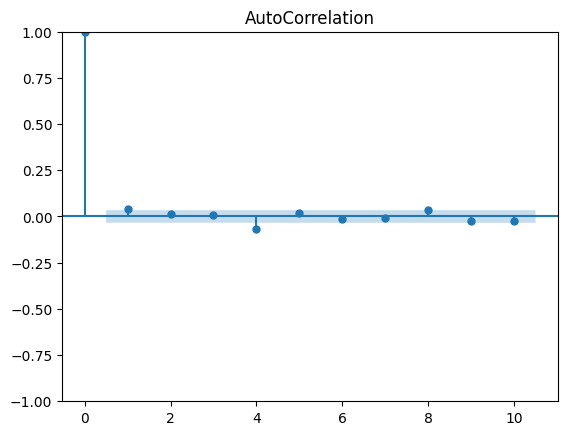

In [46]:
plot_acf(data["Stocks Seasonal+Daily Difference"].dropna(),lags=10,title="AutoCorrelation")
plt.show()

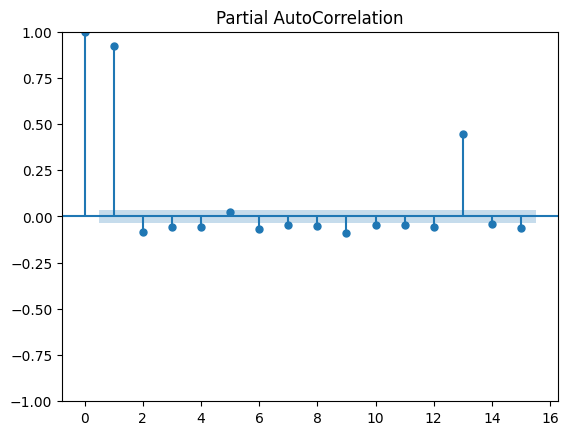

In [47]:
plot_pacf(data["Stocks Seasonal Difference"].dropna(),method='ywm',lags=15,title="Partial AutoCorrelation")
plt.show()

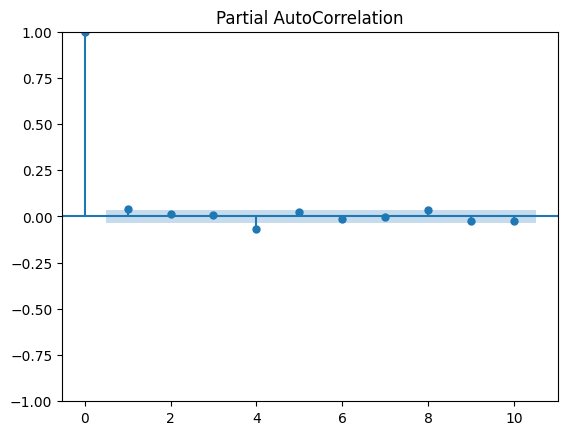

In [48]:
plot_pacf(data["Stocks Seasonal+Daily Difference"].dropna(),method='ywm',lags=10,title="Partial AutoCorrelation")
plt.show()

In [49]:
stocks_data=stocks_data[stocks_data.Date > "2015"]
df_train = stocks_data[stocks_data.Date < "2019"]
df_valid = stocks_data[stocks_data.Date >= "2019"]

In [50]:
train = df_train['Close'].values
test = df_valid['Close'].values

In [51]:
history = [x for x in train]
predictions = list()

# walk-forward validation


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6582.420, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6583.448, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6583.395, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6580.523, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6582.610, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.369 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  989
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3289.262
Date:                Mon, 27 Feb 2023   AIC                           6580.523
Time:                        19:58:48   BIC                           6585.419
Sample:                             0   HQIC                          6582.385
                                - 989                                       

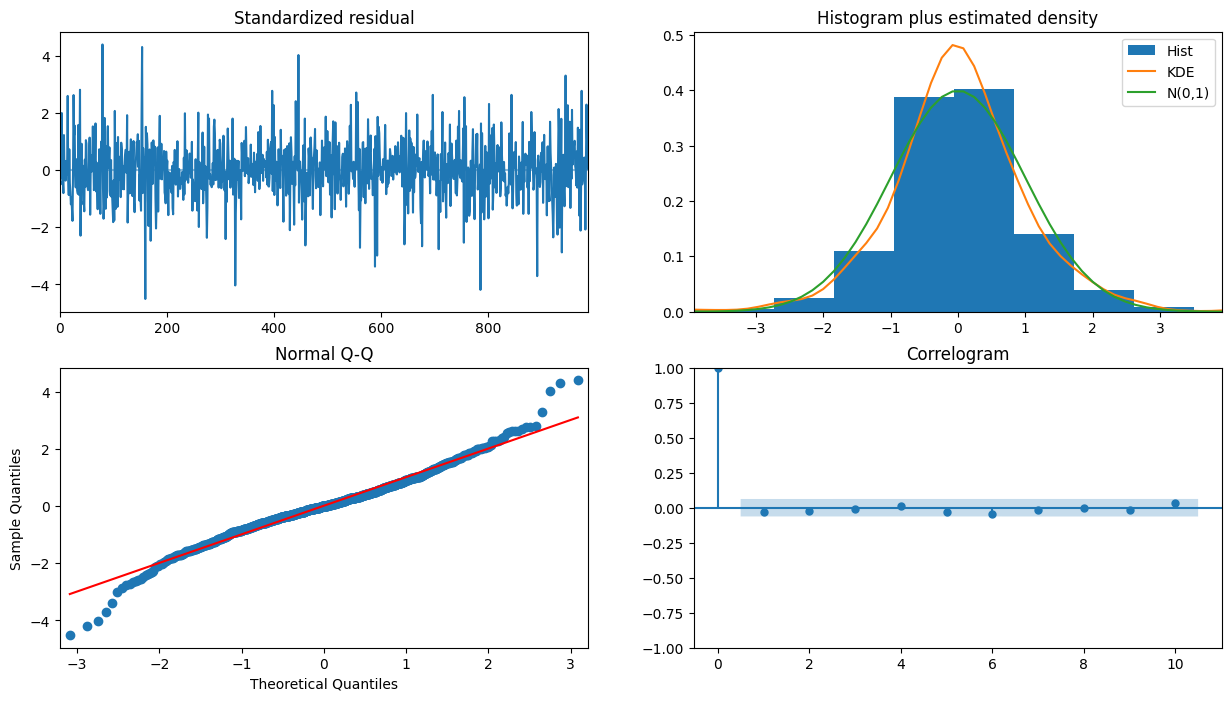

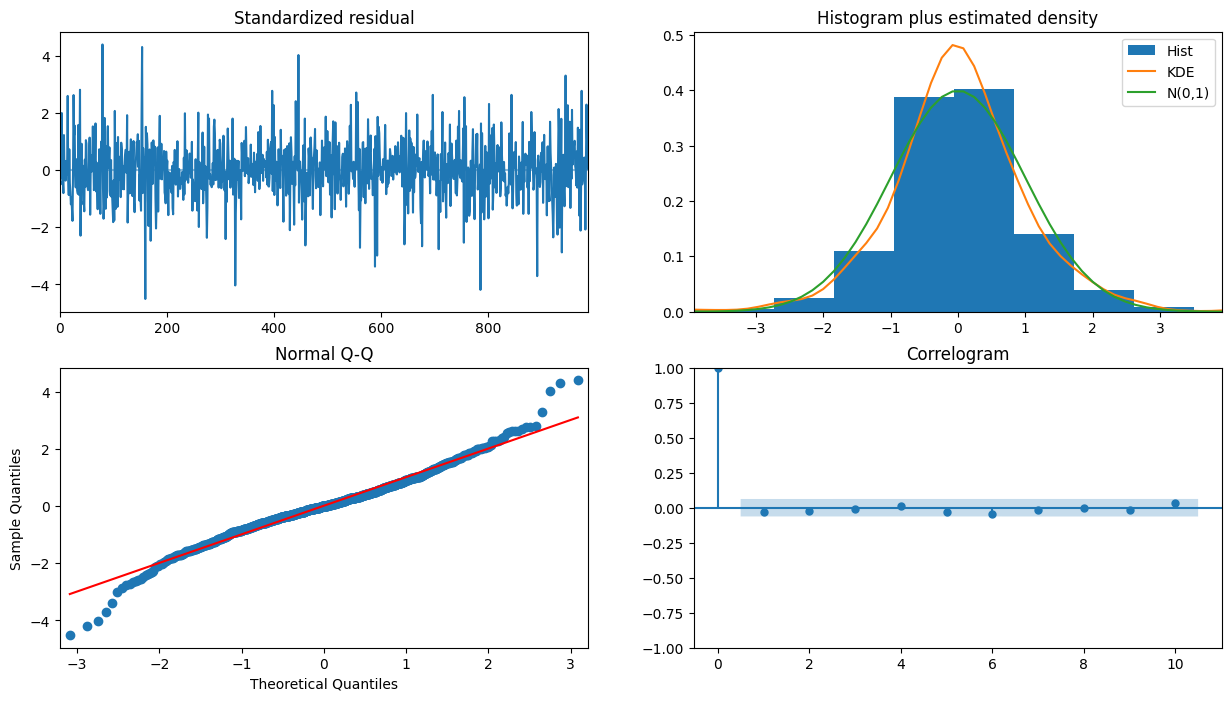

In [82]:
    model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    print(model_autoARIMA.summary())
    model_autoARIMA.plot_diagnostics(figsize=(15,8))
    


In [53]:
y_pred = model_autoARIMA.predict(n_periods=12)
y_pred

array([387.7, 387.7, 387.7, 387.7, 387.7, 387.7, 387.7, 387.7, 387.7,
       387.7, 387.7, 387.7])

In [54]:
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(df_valid)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [55]:
test.shape

(577,)

In [56]:
len(predictions)

577

In [57]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predictions,name='Forecast_Rolling_ARIMA'))
fig.show()

In [58]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [59]:
differenced = difference(train)
model=ARIMA(differenced,order=(2,1,2))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

In [60]:
# evaluate forecasts
rolling_mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % rolling_mse)

Test MSE: 118.707


In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predictions,name='Forecast_Rolling_ARIMA'))
fig.show()

In [62]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [63]:
differenced = difference(train)
model=ARIMA(differenced,order=(2,1,2))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

In [64]:
history = [x for x in train]
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat)
    history.append(inverted)
    predicted_results.append(inverted)

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [66]:
mse_daily = mean_squared_error(df_valid['Close'],predicted_results)
print('Test MSE: %.3f' %mse_daily)

Test MSE: 11790.823


In [67]:
days_in_year=365
differenced = difference(train,days_in_year)
model=ARIMA(differenced,order=(10,1,4))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [68]:
history = [x for x in train]
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    history.append(inverted)
    predicted_results.append(inverted)

In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [79]:
mse_seasonal = mean_squared_error(test, predicted_results)
print('Test MSE: %.3f' % mse_seasonal)

Test MSE: 12678.174


In [69]:
days_in_year=365
differenced_S = difference(train,days_in_year)
differenced = difference(differenced_S)
model=ARIMA(differenced,order=(5,2,5))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [70]:
history = [x for x in train]
predicted_results = list()


interval=366
for yhat in forecast:
    inverted = inverse_difference(history, yhat, interval)
    history.append(inverted)
    predicted_results.append(inverted)

In [71]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [72]:

mse_sd = mean_squared_error(test, predicted_results)
print('Test MSE: %.3f' % mse_sd)

Test MSE: 12678.174


In [80]:
models = ['Rolling ARIMA','ARIMA']
lst_acc = [rolling_mse,mse_seasonal]
MSE = pd.DataFrame({'Model': models, 'Mean Squared Error': lst_acc})
MSE.sort_values(by="Mean Squared Error")

Model  Mean Squared Error
0  Rolling ARIMA          118.707243
1          ARIMA        12678.173979